#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 06 de maio. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_06mai2021.csv'
df = pd.read_csv(filename, delimiter=';',
                 error_bad_lines=False)

In [3]:
df.shape

(2282184, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282184 entries, 0 to 2282183
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          int64  
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(6), int64(6), object(5)
memory usage: 296.0+ MB


In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
861900,Nordeste,BA,Matina,29,292105.0,29007.0,GUANAMBI,2021-01-31,5,12201.0,56,1,1,0,NaN,NaN,0.0
2244623,Centro-Oeste,GO,Mutunópolis,52,521410.0,52008.0,NORTE,2020-10-10,41,3778.0,21,0,0,0,NaN,NaN,0.0
169099,Norte,TO,Mateiros,17,171270.0,17008.0,AMOR PERFEITO,2020-08-19,34,2684.0,1,0,0,0,NaN,NaN,0.0
1767883,Sul,PR,Doutor Ulysses,41,412863.0,41002.0,2ª RS METROPOLITANA,2020-07-06,28,5580.0,0,0,0,0,NaN,NaN,1.0
1711965,Sul,PR,Paula Freitas,41,411860.0,41006.0,6ª RS UNIAO DA VITORIA,2020-10-24,43,5873.0,19,0,2,0,NaN,NaN,0.0
1818440,Sul,SC,Iraceminha,42,420775.0,42001.0,EXTREMO OESTE,2021-02-04,5,3976.0,206,0,1,0,NaN,NaN,0.0
2139383,Centro-Oeste,MT,Cuiabá,51,510340.0,51002.0,BAIXADA CUIABANA,2020-07-16,29,612547.0,6832,172,362,-4,NaN,NaN,1.0
549193,Nordeste,PB,Damião,25,250535.0,25004.0,4ª REGIAO,2020-11-05,45,5330.0,50,0,1,0,NaN,NaN,0.0
1423252,Sudeste,SP,Gavião Peixoto,35,351685.0,35031.0,CENTRAL DO DRS III,2020-09-07,37,4789.0,175,0,1,0,NaN,NaN,0.0
100564,Norte,PA,Magalhães Barata,15,150410.0,15008.0,METROPOLITANA III,2020-11-06,45,8548.0,196,0,12,0,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    99406
RJ    45914
MG    35165
RS    25668
PR    23493
BA    18980
CE    18167
GO    15467
PE    14385
SC    13931
PA    13391
AM    12707
MT     9877
ES     9784
DF     8026
MA     7473
PB     6964
MS     5937
RN     5599
RO     5281
PI     5260
SE     4441
AL     4329
TO     2630
AP     1573
AC     1568
RR     1533
Name: obitosAcumulado, dtype: int64

<AxesSubplot:ylabel='estado'>

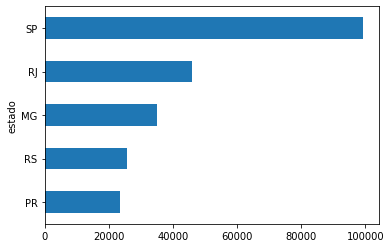

In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

<AxesSubplot:xlabel='data'>

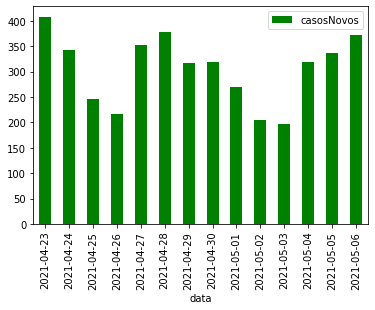

In [8]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(14).plot(kind='bar', 
        x='data', y='casosNovos', color='GREEN')

<AxesSubplot:xlabel='semanaEpi'>

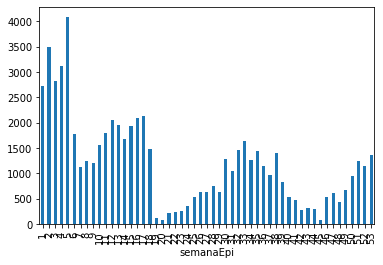

In [9]:
sjc.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

<AxesSubplot:xlabel='data'>

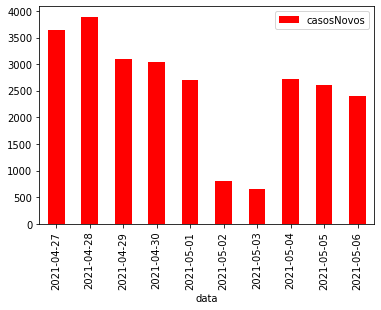

In [10]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

<AxesSubplot:xlabel='semanaEpi'>

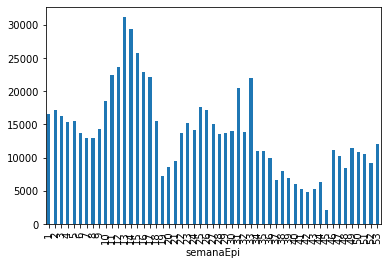

In [11]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')